# **Programming Project.** <dt>
#**Analysing the dataset: 'Top Spotify songs from 2010-2019 - BY YEAR'.**

## By Daria Lapko, DSBA 201-2.

---

To start with, we need to import all the needed packages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/new.csv', 'r') as f:
  main_data = pd.read_csv(f)

At first, let us see first 10 lines of dataset to know how to interact with it.

In [ ]:
main_data.head(10)

,Title,Artist,Genre,Year,BpM,Energy,Dance,dB,Live,Valence,sec,Acoustic,Speech,Popular
0,Hey Soul Sister,Train,electro,2010,97,89,67,-4,8,80,217,19,4,83.0
1,Love The Way You Lie,Eminem,electro,2010,87,93,75,-5,52,64,263,24,23,82.0
2,TiK ToK,Kesha,electro,2010,120,84,76,-3,29,71,200,10,14,80.0
3,Bad Romance,Lady Gaga,electro,2010,119,92,70,-4,8,71,295,0,4,79.0
4,Just the Way You Are,Bruno Mars,electro,2010,109,84,64,-5,9,43,221,2,4,78.0
5,Baby,Justin Bieber,electro,2010,65,86,73,-5,11,54,214,4,14,77.0
6,Dynamite,Taio Cruz,electro,2010,120,78,75,-4,4,82,203,0,9,77.0
7,Secrets,OneRepublic,electro,2010,148,76,52,-6,12,38,225,7,4,77.0
8,Empire State of Mind (Part II) Broken Down,Alicia Keys,electro,2010,93,37,48,-8,12,14,216,74,3,76.0
9,Only Girl (In The World),Rihanna,electro,2010,126,72,79,-4,7,61,235,13,4,73.0


**Explanation of the given dataset** <dt>
This dataset has several variables about the songs and is based on Billboard. There are the most popular songs in the world by year (2010-2019) and 13 variables to be explored. Data was stracted from: http://organizeyourmusic.playlistmachinery.com/. <dt>

**Explaining the variables**: <dt>
Title - the name of the song. <dt>
Artist - the author/performer of the song. <dt>
Genre - the genre of the track. <dt>
Year - the release year of the recording. Note that due to vagaries of releases, re-releases, re-issues and general madness, sometimes the release years are not precise. <dt>
Beats Per Minute (BpM) - The tempo of the song.<dt>
Energy - The energy of a song - the higher the value, the more energtic. <dt>
Danceability (Dance) - The higher the value, the easier it is to dance to this song. <dt>
Loudness (dB) - The higher the value, the louder the song. <dt>
Liveness (Live) - The higher the value, the more likely the song is a live recording. <dt>
Valence - The higher the value, the more positive mood for the song. <dt>
Duration (sec) - The length of the song. <dt>
Acousticness (Acoustic) - The higher the value the more acoustic the song is. <dt>
Speechiness (Speech) - The higher the value the more spoken word the song contains. <dt>
Popularity (Popular) - The higher the value the more popular the song is. <dt>

Now, let us see the main characteristics of each column of data in our dataset.

In [ ]:
main_data.describe(include='all')

,Title,Artist,Genre,Year,BpM,Energy,Dance,dB,Live,Valence,sec,Acoustic,Speech,Popular
count,599,599,599,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,598.000000
unique,580,183,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Runnin' (Lose It All),Katy Perry,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,17,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2014.572621,118.455760,70.540902,64.370618,-5.572621,17.774624,52.320534,224.555927,14.398998,8.325543,66.563545
std,NaN,NaN,NaN,2.596174,24.830751,16.319282,13.396932,2.803662,13.095135,22.515192,34.133661,20.815066,7.433037,14.512461
min,NaN,NaN,NaN,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,NaN,NaN,NaN,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,NaN,NaN,NaN,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.500000,239.000000,17.000000,9.000000,76.000000


This table shows us a lot of information about each column of data. <dt>

###**Let us start with analyzing string-type data (first 3 columns).**

*   There are 580 unique titles of songs, while overall there are 599 songs. Therefore, some names may have repeated (i.e. other artists have songs with the same name). The most common title, which repeated 2 times, is "Hello".
*   There are 184 unique artists, while overall there are 599. That proves that most of the artists presented had their songs included in Billboard top list more than one time. The most common artist is Katy Perry and her songs appeared 17 times in Billboard top list over a 10-year period.
*   Concerning genres, there are 50 unique ones and they are frequently repeated as overall there are 599 songs and each has its genre. The most popular genre is dance pop, and it appeared in the list overall 324 times (i.e. 324 songs in the list have this genre).



Additionally, we can find out which exact unique genres exist using such a command:

In [ ]:
main_data['Genre'].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

We can also make a table to see the connection between genres and artists.

In [ ]:
pd.crosstab(main_data['Artist'], main_data['Genre'])

Genre,acoustic pop,alaska indie,alternative r&b,art pop,atl hip hop,australian dance,australian hip hop,australian pop,barbadian pop,baroque pop,belgian edm,big room,boy band,british soul,brostep,canadian contemporary r&b,canadian hip hop,canadian latin,canadian pop,candy pop,celtic rock,chicago rap,colombian pop,complextro,contemporary country,dance pop,danish pop,detroit hip hop,downtempo,edm,electro,electro house,electronic trap,electropop,escape room,folk-pop,french indie pop,hip hop,hip pop,hollywood,house,indie pop,irish singer-songwriter,latin,metropopolis,moroccan pop,neo mellow,permanent wave,pop,tropical house
Artist,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3OH!3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5 Seconds of Summer,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A Great Big World,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Adam Lambert,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adele,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Years & Years,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ZAYN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zara Larsson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


So from this table it is clear that, for example, genre of all Adele's songs included in the Billboard top list is "british soul", while all ZAYN's songs are treated as "dance pop". Also this table shows that most of the artists included in Billboard top list always practice the same genre in their songs and never change it.

###**Now, let us proceed to the more interesting part - analyzing int-type data.**<dt>

Here, I will not analyze all the columns in so a detailed way (like I did with string-type data), but I will just make some examples of what can we derive from the recieved table with data.

*   We can see that the standard deviation (std) in BpM between songs is about 25.
*   The minimum duration of song possible is 134 seconds.
*   The mean danceability of the songs is about 64. Comparing to the maximum, which is 97, we can say that this value is more than a half, so either there are some songs with very high danceability point which balance other songs with medium or lower value of danceability, or just the number of songs having danceability value more than a half exceeds the number of songs having smaller danceability value.
*   The maximum valence is 98, which means that the song with this value is just absolutely positive.








Instead of analyzing the whole table and searching for the desired values, we can output them separately. Here are few examples:

In [ ]:
main_data['Acoustic'].max()

99

In [ ]:
main_data['Artist'].mode()

0    Katy Perry
dtype: object


(mode is the value that appears most often in a set of data values, so we proved the fact that Katy Perry is the top artist in the Billboard top list)

In [ ]:
main_data['dB'].std()

2.8036618986183273

In [ ]:
main_data['Popular'].mean()

66.56354515050167

In [ ]:
main_data['Year'].min()

2010

## **I have shown some descriptive statistics of my dataset and made some simple logical conclusions. Now let me proceed to the deeper analysis of data.**

**1. How many songs was made during years 2010, 2015 and 2019?**

In [ ]:
yearten = main_data['Year'] == 2010
yearfifteen = main_data['Year'] == 2015
yearnineteen = main_data['Year'] == 2019
print(yearten.sum())
print(yearfifteen.sum())
print(yearnineteen.sum())

51
95
28


Clearly, the number of songs made during 2010 is almost half less than the number of ones made in 2015. At the same time, the number of songs in 2019 is even half less than the number of ones made in 2010. From this I can propose that the graph will have a varying tendency, increasing to the middle and then decreasing.

**2. Showing how many songs each artist had in Billboard top list per year.**

In [ ]:
pd.crosstab(main_data['Year'], main_data['Artist'], margins=True)

Artist,3OH!3,5 Seconds of Summer,A Great Big World,Adam Lambert,Adele,Alan Walker,Alessia Cara,Alesso,Alicia Keys,Ansel Elgort,Ariana Grande,Austin Mahone,Avicii,Avril Lavigne,BORNS,Bastille,Bebe Rexha,Beyonce,Birdy,Britney Spears,Bruno Mars,CNCO,Calvin Harris,Camila Cabello,Cardi B,Carly Rae Jepsen,Cashmere Cat,Charli XCX,Charlie Puth,Chris Brown,Christina Aguilera,Christina Perri,Ciara,Clean Bandit,Coldplay,DJ Khaled,DJ Snake,DNCE,Daddy Yankee,Daft Punk,...,Ricky Martin,Rihanna,Rita Ora,Robin Schulz,Robin Thicke,Rudimental,SHAED,Sam Smith,Sara Bareilles,Sean Kingston,Selena Gomez,Selena Gomez & The Scene,Shakira,Shawn Mendes,Sia,Sigala,Silk City,Sleeping At Last,Snakehips,Swedish House Mafia,T.I.,Taio Cruz,Taylor Swift,The Black Eyed Peas,The Chainsmokers,The Script,The Wanted,The Weeknd,Tinie Tempah,Tove Lo,Train,Troye Sivan,Usher,Wiz Khalifa,Years & Years,ZAYN,Zara Larsson,Zedd,fun.,All
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,1,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,2,0,4,0,0,0,0,1,0,1,0,2,0,0,0,0,0,0,51
2011,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,4,0,3,3,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,53
2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,35
2013,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,...,0,1,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,70
2014,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,0,3,4,0,3,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58
2015,0,0,0,0,1,0,1,1,1,0,3,0,1,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,1,2,0,1,0,1,0,1,0,0,2,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,1,0,95
2016,0,0,0,0,4,0,2,0,0,0,2,0,0,0,1,0,1,0,1,3,0,0,1,0,0,2,0,0,1,0,1,0,0,0,0,0,0,3,0,0,...,0,2,0,0,0,0,0,0,0,0,2,0,0,3,1,0,0,0,1,0,0,0,1,0,3,0,0,1,0,1,0,0,0,0,1,2,0,1,0,80
2017,0,0,0,0,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,1,0,1,0,0,0,0,1,1,1,1,3,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,3,0,0,2,0,1,0,0,0,0,0,1,0,2,0,65
2018,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,2,2,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,1,2,0,0,1,0,0,0,0,2,0,0,4,0,0,1,0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,64


This table gives a good view on which years were the most productive for some of the artists. Some may have left the Billboard in 2010 and never returned, and some just joined in one of the last years, some appeared in the middle by chance or luck, and some were always in the list, even with more than 1 song per year.

**3. Is it true that young songs (ones made after 2015 or in 2015) gained bigger popularity than old songs (ones made before 2015)?**

In [ ]:
indices_lessfif = main_data['Year'] < 2015
indices_morefif = main_data['Year'] >= 2015
lessfif = main_data[indices_lessfif]
morefif = main_data[indices_morefif]
lessfif_pop = lessfif['Popular'] >= 50
morefif_pop = morefif['Popular'] >= 50

print("popularity rates: \n\t for songs older than 2015: {}%, \n\t for songs of 2015 or younger: {}%.".format(
    round(100 * lessfif_pop.mean(), 2), round(100 * morefif_pop.mean(), 2)))

popularity rates: 
	 for songs older than 2015: 88.39%, 
	 for songs of 2015 or younger: 90.66%.


By data it becomes obvious that yes, the songs made after or in 2015 gained bigger popularity than old songs did in their years. Nevertheless, the value differs by only about 2%, so it is hard to say that young songs are really more popular to be heard than the old ones.

**4. How many songs are there, which have artist's name start with A?**

In [ ]:
def a(name):
  if name[0] == 'A':
    return name
artists = main_data['Artist']
artistwitha = artists.apply(a)
print(artistwitha.count()) #how many?
print(artistwitha.value_counts()) #which? (includes the repetitions with songs)

42
Adele                10
Ariana Grande         9
Alicia Keys           6
Alessia Cara          4
Avicii                3
Austin Mahone         2
Adam Lambert          2
Avril Lavigne         2
Alesso                1
Alan Walker           1
Ansel Elgort          1
A Great Big World     1
Name: Artist, dtype: int64


Now we can see that Adele is the artist that has her name starting with letter A and, at the same time, repeating most of the times on the Billboard top list comparing to the others who have their names starting with A. In other words, she has the biggest number of songs the was included in Billboard top list 2010-2019 among people whose name starts with A. Overall, the number of songs released by artists whose name starts with A is: 42.

**5. And how many/what artists do have spaces in their names? (meaning that these authors don't have their scenic name consist of only one word)**

In [ ]:
def a(name):
  if (' ' in name) and (name not in used_names):
    used_names.append(name)
    return name
used_names = []
artists = main_data['Artist']
artistwitha = artists.apply(a)
print(artistwitha.count()) #how many?
print(artistwitha.value_counts()) #which? (does not include repetitions)

129
Sam Smith          1
Sean Kingston      1
Mariah Carey       1
Jennifer Hudson    1
Sara Bareilles     1
                  ..
David Guetta       1
Jonas Blue         1
The Wanted         1
Tove Lo            1
John Legend        1
Name: Artist, Length: 129, dtype: int64


Comparing to the previous point, here I removed the repetitions with different songs so that we can clearly see exactly how many different names we have that include space (i.e. consist of 2 or more words). The result is 129 artists.

**7. How does the mean speechiness vary from year to year?**

In [ ]:
d = {}
for i in range (2010, 2020):
  indices_year = main_data['Year'] == i
  year = main_data[indices_year]
  d[i] = [year['Speech'].mean()]
meanspeech_peryear = pd.DataFrame(d, index=['Mean Speech'])
meanspeech_peryear.transpose()

,Mean Speech
2010,8.882353
2011,9.660377
2012,5.800000
2013,8.342857
2014,8.672414
2015,7.052632
2016,8.362500
2017,9.784615
2018,8.625000
2019,7.321429


From this table we can see that there is no actual dependence of speechiness on year and values fluctuate constantly from year to year. One important thing that I can derive from the received data is that in 2012 there were songs which contained of minimum number of words and their number outweighs the number of those in other years, therefore decreasing the mean value of speechiness in 2012. I can propose that these were mostly dancing songs, which usually have a minimum number of words included and which were already gaining popularity in 2012.

## **Now, proceeding to the next step - visual analysis.**

**1. Plotting pairwise dependencies of all variables.**

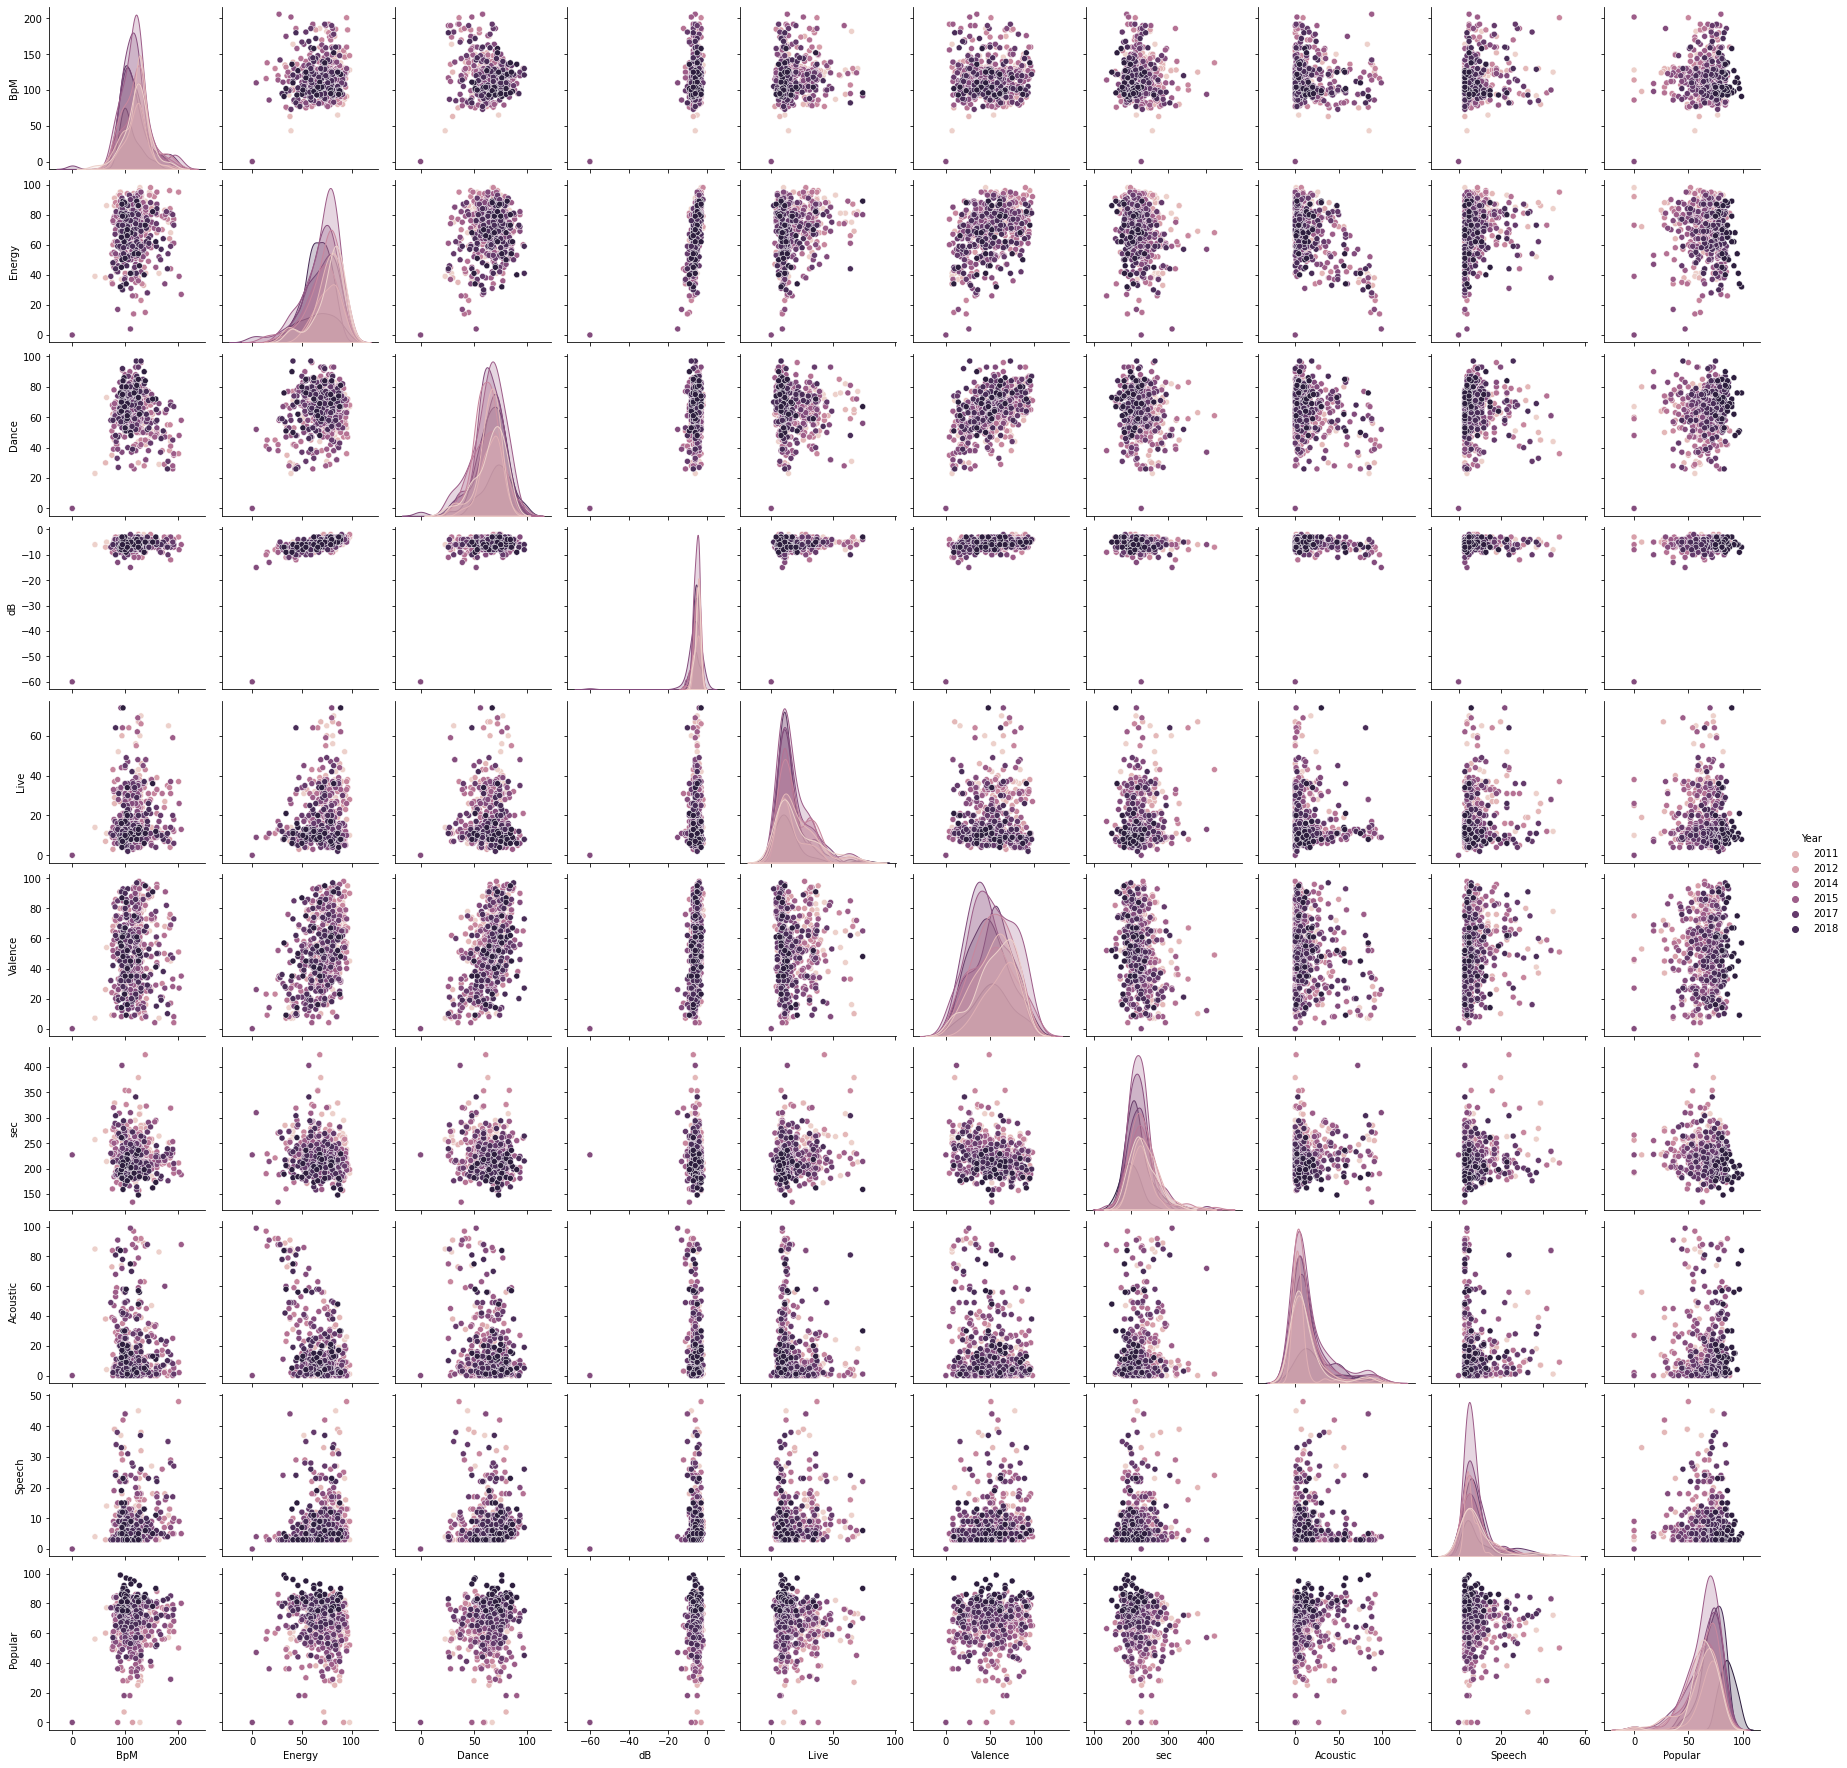

In [ ]:
import seaborn as sns
sns.pairplot(main_data[['Year', 'BpM', 'Energy', 'Dance', 'dB', 'Live', 'Valence', 'sec', 'Acoustic', 'Speech', 'Popular']], hue='Year')

Here we can see all possible pairwise dependencies between variables. Additionally, I highlighted the years in all dependence graphs so that it is possible to see during which year each song was in Billboard top list while comparing its features. We can derive a lot of information from these graphs. Some examples:
*  Songs with medium level of danceability (25-85) have the liveliness indicator mostly in between 0 and 20. So, dancing songs usually are not presented lively. I also can say that a lot of the modern songs (the darkest spots on graph) mostly own low liveliness indicator (<20), while the earlier songs (lighter spots) sometimes had their liveliness quite high even though their danceablility was on the medium level.
*   There is an interesting tendency in graph of speechiness and acousticness dependence. Either the acousticness indicator is high and speech indicator is low or vice versa. There are only a few examples when there was a medium or even high indicator of acousticness along with high number of words in a song. As a result, acoustic songs contain minimum of words and wordy songs are not acoustic.



**2. Going back to the analysis of number of songs made in 2010, 2015 and 2019.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


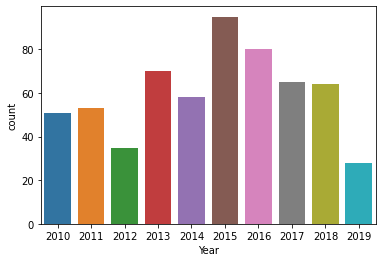

In [ ]:
sns.countplot(main_data['Year'])

Referring to the first task in the previous section, I proposed that the graph will have a varying tendency, increasing to the middle and then decreasing. As we can see, my expectations appeared to be true. In fact, the graph does not always go up and down smoothy, but sometimes falls sharply, like in 2012 and 2014. The main trend I assumed, however, still stays the same.

**3. How different parameters of songs changed with time.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


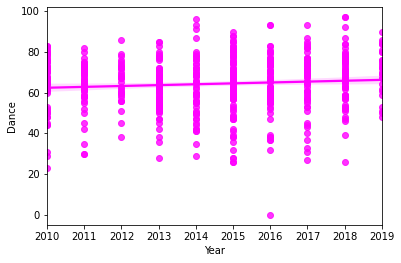

In [ ]:
sns.regplot(main_data['Year'], main_data['Dance'], color='magenta')

This graph illustrates the danceability trend of songs in Billboard top list from 2010 to 2019. As I have already mentioned, I expect danceability level to rise with years as in reality I can see many authors making dancing music right now and the number is incomparably bigger than ten years ago. However, eventually, the trend did not go up sharply. So, the dancing music genre is gaining popularity steadily with years. Additionally to say, every year there exist songs which are not intended to be for dancing, so they worsen the overall picture.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


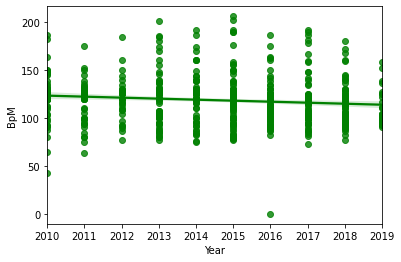

In [ ]:
sns.regplot(main_data['Year'], main_data['BpM'], color='green')

This graph represents the trend of beat per minute of songs throughout the period of 10 years. There is certainly a decreasing line, which means that the number of slower songs (and probably more lyrical and soulful) increases, and does it quite fast. Anyways, we can still see the separated dots with higher values of BpM than the mean at the certain year, so faster songs never disappeared and still exist.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


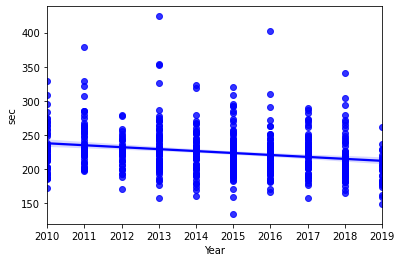

In [ ]:
sns.regplot(main_data['Year'], main_data['sec'], color='blue')

This graph illustrates clearly the trend of song length parameter. There is a significant fall in figure from 2010 to 2019, as we can see. I can assume that lengthy songs are gaining less popularity among listeners, while more time and money needed to record them. Therefore either artists stop to make such songs or sound-recording companies refuse to let artists record those.

**4. Explaining why I think that popularity of dancing songs grows with years.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


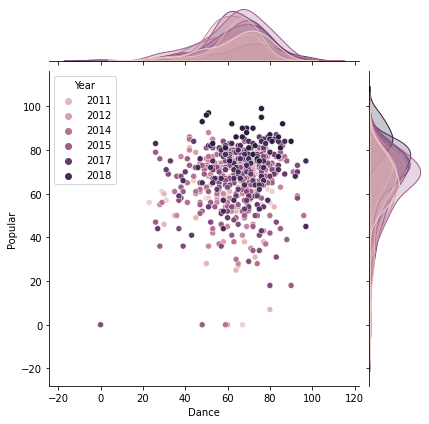

In [ ]:
sns.jointplot(main_data['Dance'], main_data['Popular'], hue=main_data['Year'])

This joint graph with 2 types of data representation allows us to see both the counter of songs with varying danceability and popularity (presented in form of histograms at the top and on the right) and the dependence of these parameters on each other in different years. I have repeatedly mentioned that dancing songs are gaining popularity with years, so more and more artist try to involve at least some dancing melody in their music works so that listeners will like these. We can clearly see this dependence on the given graph. The popularity of most of songs increases along with danceability, so generally songs are placed close to the upper left corner of the graph area, with popularity figure between 50 and 85 and danceability value between 40 and 90. Plus, the newer songs are, the more they tend to the upper left corner, which straightforwardly means that the value of both danceability and popularity increases with years. On the other hand, the songs which are not included in the mentioned range are primarily older than 2015, which also shows that before dancing songs were not so popular and appreciated. (probably because the ones who tried to record danceability songs got popularity approximately 0 at that time, as we can see in the graph by these lowest dots).

##**Conclusion**

To conclude, I would say that the dataset I have chosen provides me with a great amount of data to analyze, and the information derived from it is very interesting. I also want to point out that this task is a good way to discover personally how data analyzing process is carried out and get familiar with the common instruments utilized for it. So, I find this project a very useful expirience.